# Is Quant Trading Gambling?

In this notebook, we'll explore the similarities between quantitative trading and games of chance like poker (specifically Texas Hold'em). We'll discuss concepts like edge, expected value, and optimal decision-making under uncertainty, and visualize how these ideas play out in both trading and poker.

## Games of Chance v. Games of Incomplete Information

### Edge in Games of Chance: Roulette

The house's edge exists in some games of chance by construction. 

This game of chance [roulette] offers the house a slight theoretical edge which leads to a theoretical accumulation of positive expected value over time.

Of course the actual wealth path itself is stochastic so the casino and players can still lose or make money in the short run but in the long run there should be relative convergence to this theoretical edge in the form of P/L for the casino (or no casinos would be in business).

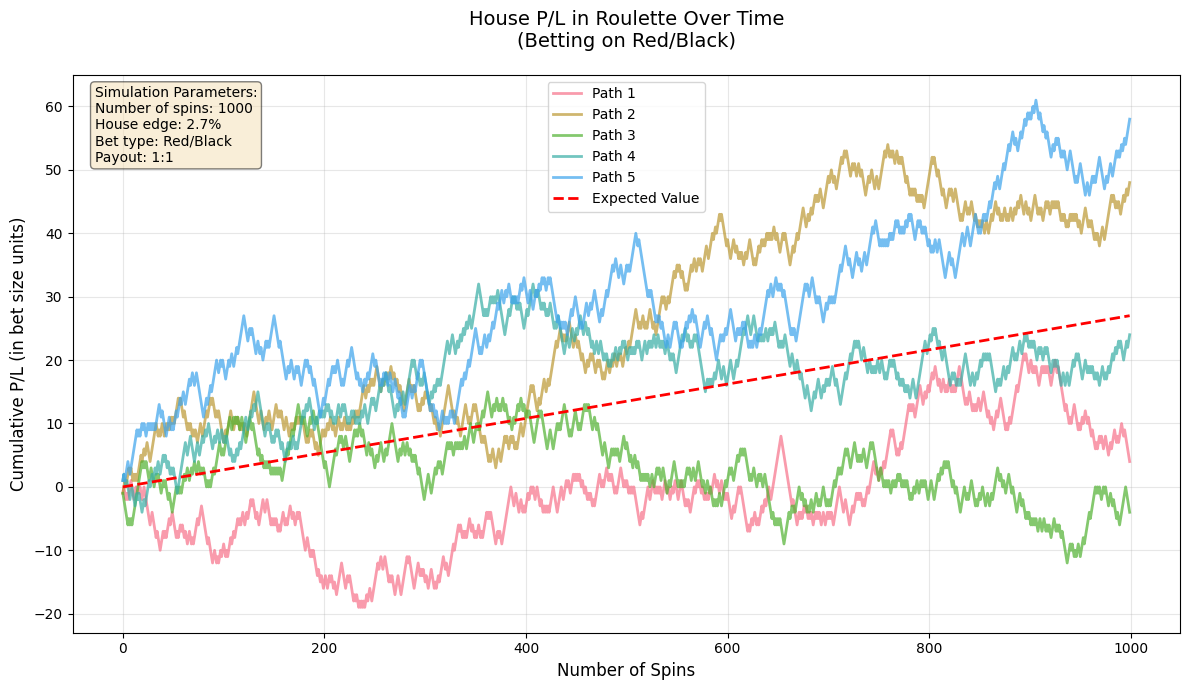

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_palette("husl")

# Roulette simulation parameters
n_spins = 1000
n_paths = 5
bet_size = 1

# European roulette probabilities
p_win = 18/37  # Betting on black/red
payout = 1     # 1:1 payout

# House edge per spin
house_edge = (19-18)/37  # About 2.7%

# Simulate multiple paths
paths = np.zeros((n_paths, n_spins))
for path in range(n_paths):
    spins = np.random.random(n_spins)
    results = np.where(spins > p_win, bet_size, -bet_size)
    paths[path] = np.cumsum(results)

# Plot
plt.figure(figsize=(12, 7))
for path in range(n_paths):
    plt.plot(paths[path], alpha=0.7, linewidth=2, label=f'Path {path+1}')

# Add expected value line
x = np.arange(n_spins)
expected_value = x * house_edge * bet_size
plt.plot(x, expected_value, 'r--', linewidth=2, label='Expected Value')

plt.title("House P/L in Roulette Over Time\n(Betting on Red/Black)", fontsize=14, pad=20)
plt.xlabel("Number of Spins", fontsize=12)
plt.ylabel("Cumulative P/L (in bet size units)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add text box with statistics
textstr = f'Simulation Parameters:\n' \
          f'Number of spins: {n_spins}\n' \
          f'House edge: {house_edge:.1%}\n' \
          f'Bet type: Red/Black\n' \
          f'Payout: 1:1'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

## Edge in Games of Incomplete Information: Poker

Poker is a game of incomplete information. Each player must make decisions based on their hand, the visible cards, and their beliefs about opponents' hands. The Bellman equation, a fundamental concept in reinforcement learning and dynamic programming, helps us think about optimal actions in such uncertain environments.

> **Bellman Equation (for reference):**
> 
> $$V(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s'|s, a) V(s') \right]$$

In poker, as in trading, the goal is to accumulate positive expected value (EV) over time. This means making decisions that, on average, will lead to profit, even if individual outcomes are uncertain.

## Edge in Games of Incomplete Information: Trading

Trading is a more chaotic game of incomplete information with many moving pieces including but not limited to...

- macro factors (inflation, interest rates, ...)
- administration (U.S. government, policy, regulation, ...)
- industry trajectory (technology, advancements and adoptions, ...)
- firm specific trajectory (a firm's cashflows, earnings, products, ...)

The only thing that is certain in this game is that your model is *wrong* and subject to change at any given time.

Traders are tasked with optimal decision making under this uncertainty, and as we have shown time and time again in each of my videos - just because their models are fundamentally wrong does not preclude them from making money!

Theoretical edge in this capacity exists from experience in tandem with models. A good reference is any work on Deep Bellman Hedging (Hans Buehler) or job listings for traders: if experience had nothing to do with trading and it were all luck why would we hire an experienced trader?  Moreover, we couldn't learn anything of the true asset price distribution from an empirical distribution like Buehler et al.

Turns out, understanding what decisions to make in the face of uncertainty (trading, poker: games of incomplete information) come from experiencing the environment in tandem with more abstract models.  

Poker players decide when to raise, call, or fold. Traders decide when to buy, sell or hold.

## Decision Levers: Poker vs. Trading

| Poker | Trading |
|-------|---------|
| Fold (hedge risk) | Hedge (reduce exposure) |
| Call (hold position) | Hold (maintain position) |
| Raise (increase risk/size) | Increase position size |
| Bet sizing | Trade sizing |

Both domains require acting optimally under uncertainty, using available information to maximize long-term gains.

## Edge Accumulation: Sample Paths

Let's simulate the P/L (profit and loss) of a strategy with a small positive edge over time, similar to a skilled poker player or a quant trading strategy.

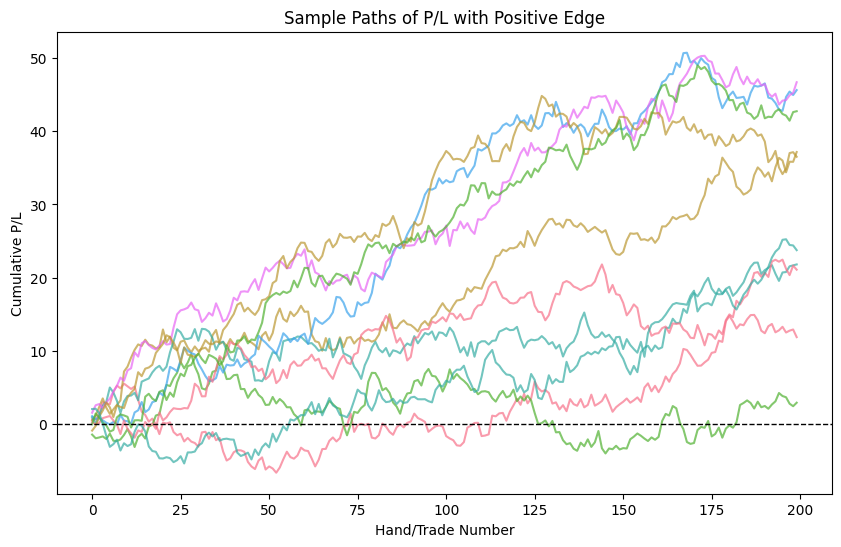

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_steps = 200
edge = 0.1  # small positive expected value per trade/hand
std = 1.0  # standard deviation of outcomes

sample_paths = []
for _ in range(10):
    outcomes = edge + std * np.random.randn(n_steps)
    sample_paths.append(np.cumsum(outcomes))

plt.figure(figsize=(10, 6))
for path in sample_paths:
    plt.plot(path, alpha=0.7)
plt.axhline(0, color='k', linestyle='--', lw=1)
plt.title('Sample Paths of P/L with Positive Edge')
plt.xlabel('Hand/Trade Number')
plt.ylabel('Cumulative P/L')
plt.show()

Notice how, despite the randomness, most paths trend upward due to the positive edge. This is analogous to how a skilled poker player or a successful quant trader accumulates profits over time.

## Conclusion: Is Quant Trading Gambling?

Both quant trading and poker involve risk, uncertainty, and the need for optimal decision-making. The key difference is that, in trading, we seek to find and exploit persistent edges, just as a skilled poker player does. If our edge is real and stable, we expect to accumulate profits over time. If not, both activities can devolve into gambling.

**The line between gambling and trading is the presence of a true, sustainable edge and the discipline to act on it optimally.**